# Python code um das Newtonfraktal zu veranschaulichen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Wir benutzen das Newtonsverfahren bei unserem komplexen Polynom
### f(z) = $z^3−1$ 
### Welches folgende Nullstellen hat
### $n_1$: 1

### $n_2$: −0.5 + 0.5√3i

### $n_3$: −0.5 − 0.5√3i

In [2]:
# z -> The Initial guess for the root  || max_inter -> The Maximum number of iterations || tol -> Tolerance for determing convergence
def newton_method(z, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        z_next = z - (z**3 - 1) / (3 * z**2)  # Newton's method
        if abs(z_next - z) < tol:             # Break condition
            return z_next, i
        z = z_next
    return z, max_iter

### Nun brauchen wir noch eine Funktion, die das Newtonsverfahren auf jeden Punkt in der komplexen Ebene anwendet, um unser Fraktal zu erstellen

In [3]:
# xmin, xmax, ymin, ymax -> Is the range of the complex plane 
# width, height -> Is the resolution of the image
def newton_fractal(xmin, xmax, ymin, ymax, width, height, max_iter=100, tol=1e-6):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    fractal = np.zeros((height, width, 3))  # Note: height, width to match image coordinates    
    for i in range(width):
        for j in range(height):
            zx, zy = x[i], y[j]
            z = complex(zx, zy)
            root, iters = newton_method(z, max_iter, tol)
            
            # Color based on the root
            if abs(root - 1) < tol:
                color = [1, 0, 0]  # Red
            elif abs(root + 0.5 - 0.5j * np.sqrt(3)) < tol:
                color = [0, 1, 0]  # Green
            elif abs(root + 0.5 + 0.5j * np.sqrt(3)) < tol:
                color = [0, 0, 1]  # Blue
            else:
                color = [0, 0, 0]  # Black for no convergence
            
            fractal[height - j - 1, i] = color  # Flip the y-coordinate    
    return fractal

### Nun fehlt nur noch die Dimensionierungsgröße und das Plotten

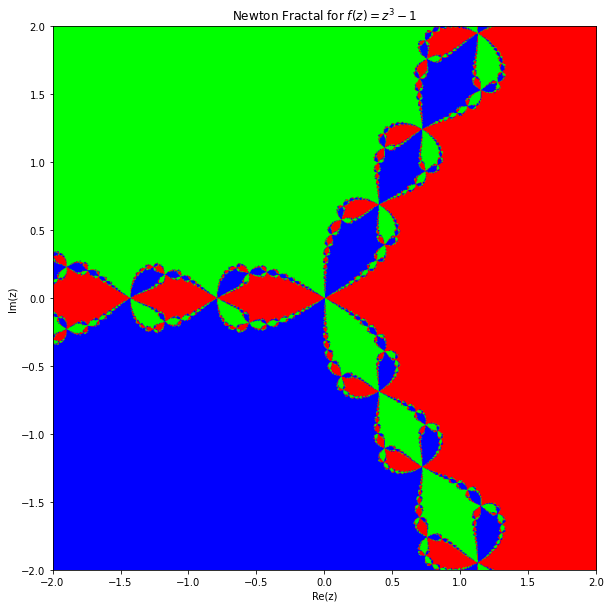

In [6]:
# xmin, xmax, ymin, ymax -> Is the range of the complex plane 
# width, height -> Is the resolution of the image.
xmin, xmax = -2, 2
ymin, ymax = -2, 2
width, height = 800, 800

# Calls newton_fractal() to generate the data needed for the fractal
fractal = newton_fractal(xmin, xmax, ymin, ymax, width, height)

plt.figure(figsize=(10, 10))
plt.imshow(fractal, extent=(xmin, xmax, ymin, ymax))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Newton Fractal for $f(z) = z^3 - 1$')
plt.show()